In [15]:
require(data.table)
require(ggplot2)
require(RColorBrewer)
require(tidyr)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: tidyr



In [40]:

Importantareas=read.csv("~/Documents/Lenfest/Plot_CSV_v2/Fig_Data_Important_Areas.csv")
#coverage=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/coverage_ecoregion_MPA.csv")
#IBA=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/IBA_coverage_ecoregion_MPA.csv")
region=read.csv("~/Documents/Lenfest/Plot_CSV_v2/Regions.csv")

In [41]:
Importantareas=merge(Importantareas, region, by="NAME")

In [42]:
Importantareas=as.data.frame(sapply(Importantareas, function(x) gsub("-1", "NA", x)))

In [43]:
colnames(Importantareas)

[1] "NAME"           "Ecoregion_ID.x" "PCT_IBA_MPA"    "PCT_IBA_FPA"   
[5] "PCT_BIA_MPA"    "PCT_BIA_FPA"    "Ecoregion_ID.y" "Region"

In [44]:
Importantareas=pivot_longer(Importantareas,
  cols=c('PCT_IBA_MPA','PCT_IBA_FPA','PCT_BIA_MPA','PCT_BIA_FPA'),
  names_to = c("IA","PA"),
    names_prefix = "PCT_",
    names_sep = "_",
  values_to = "percent"
         )

In [57]:
Importantareas$percent=as.numeric(Importantareas$percent)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [63]:
Importantareas[Importantareas$IA=="BIA",]

NAME,Ecoregion_ID.x,Ecoregion_ID.y,Region,IA,PA,percent
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Acadian Atlantic,1,1,East Coast,BIA,MPA,5.100100890
Acadian Atlantic,1,1,East Coast,BIA,FPA,0.003482674
Alaskan/Fjordland Pacific,2,2,Alaska,BIA,MPA,2.486008070
Alaskan/Fjordland Pacific,2,2,Alaska,BIA,FPA,0.373093888
Aleutian Archipelago,3,3,Alaska,BIA,MPA,1.478147232
Aleutian Archipelago,3,3,Alaska,BIA,FPA,1.361500519
American Samoa,4,4,Pacific Islands,BIA,MPA,NA
American Samoa,4,4,Pacific Islands,BIA,FPA,NA
Arctic Basin,5,5,Alaska,BIA,MPA,NA


Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”


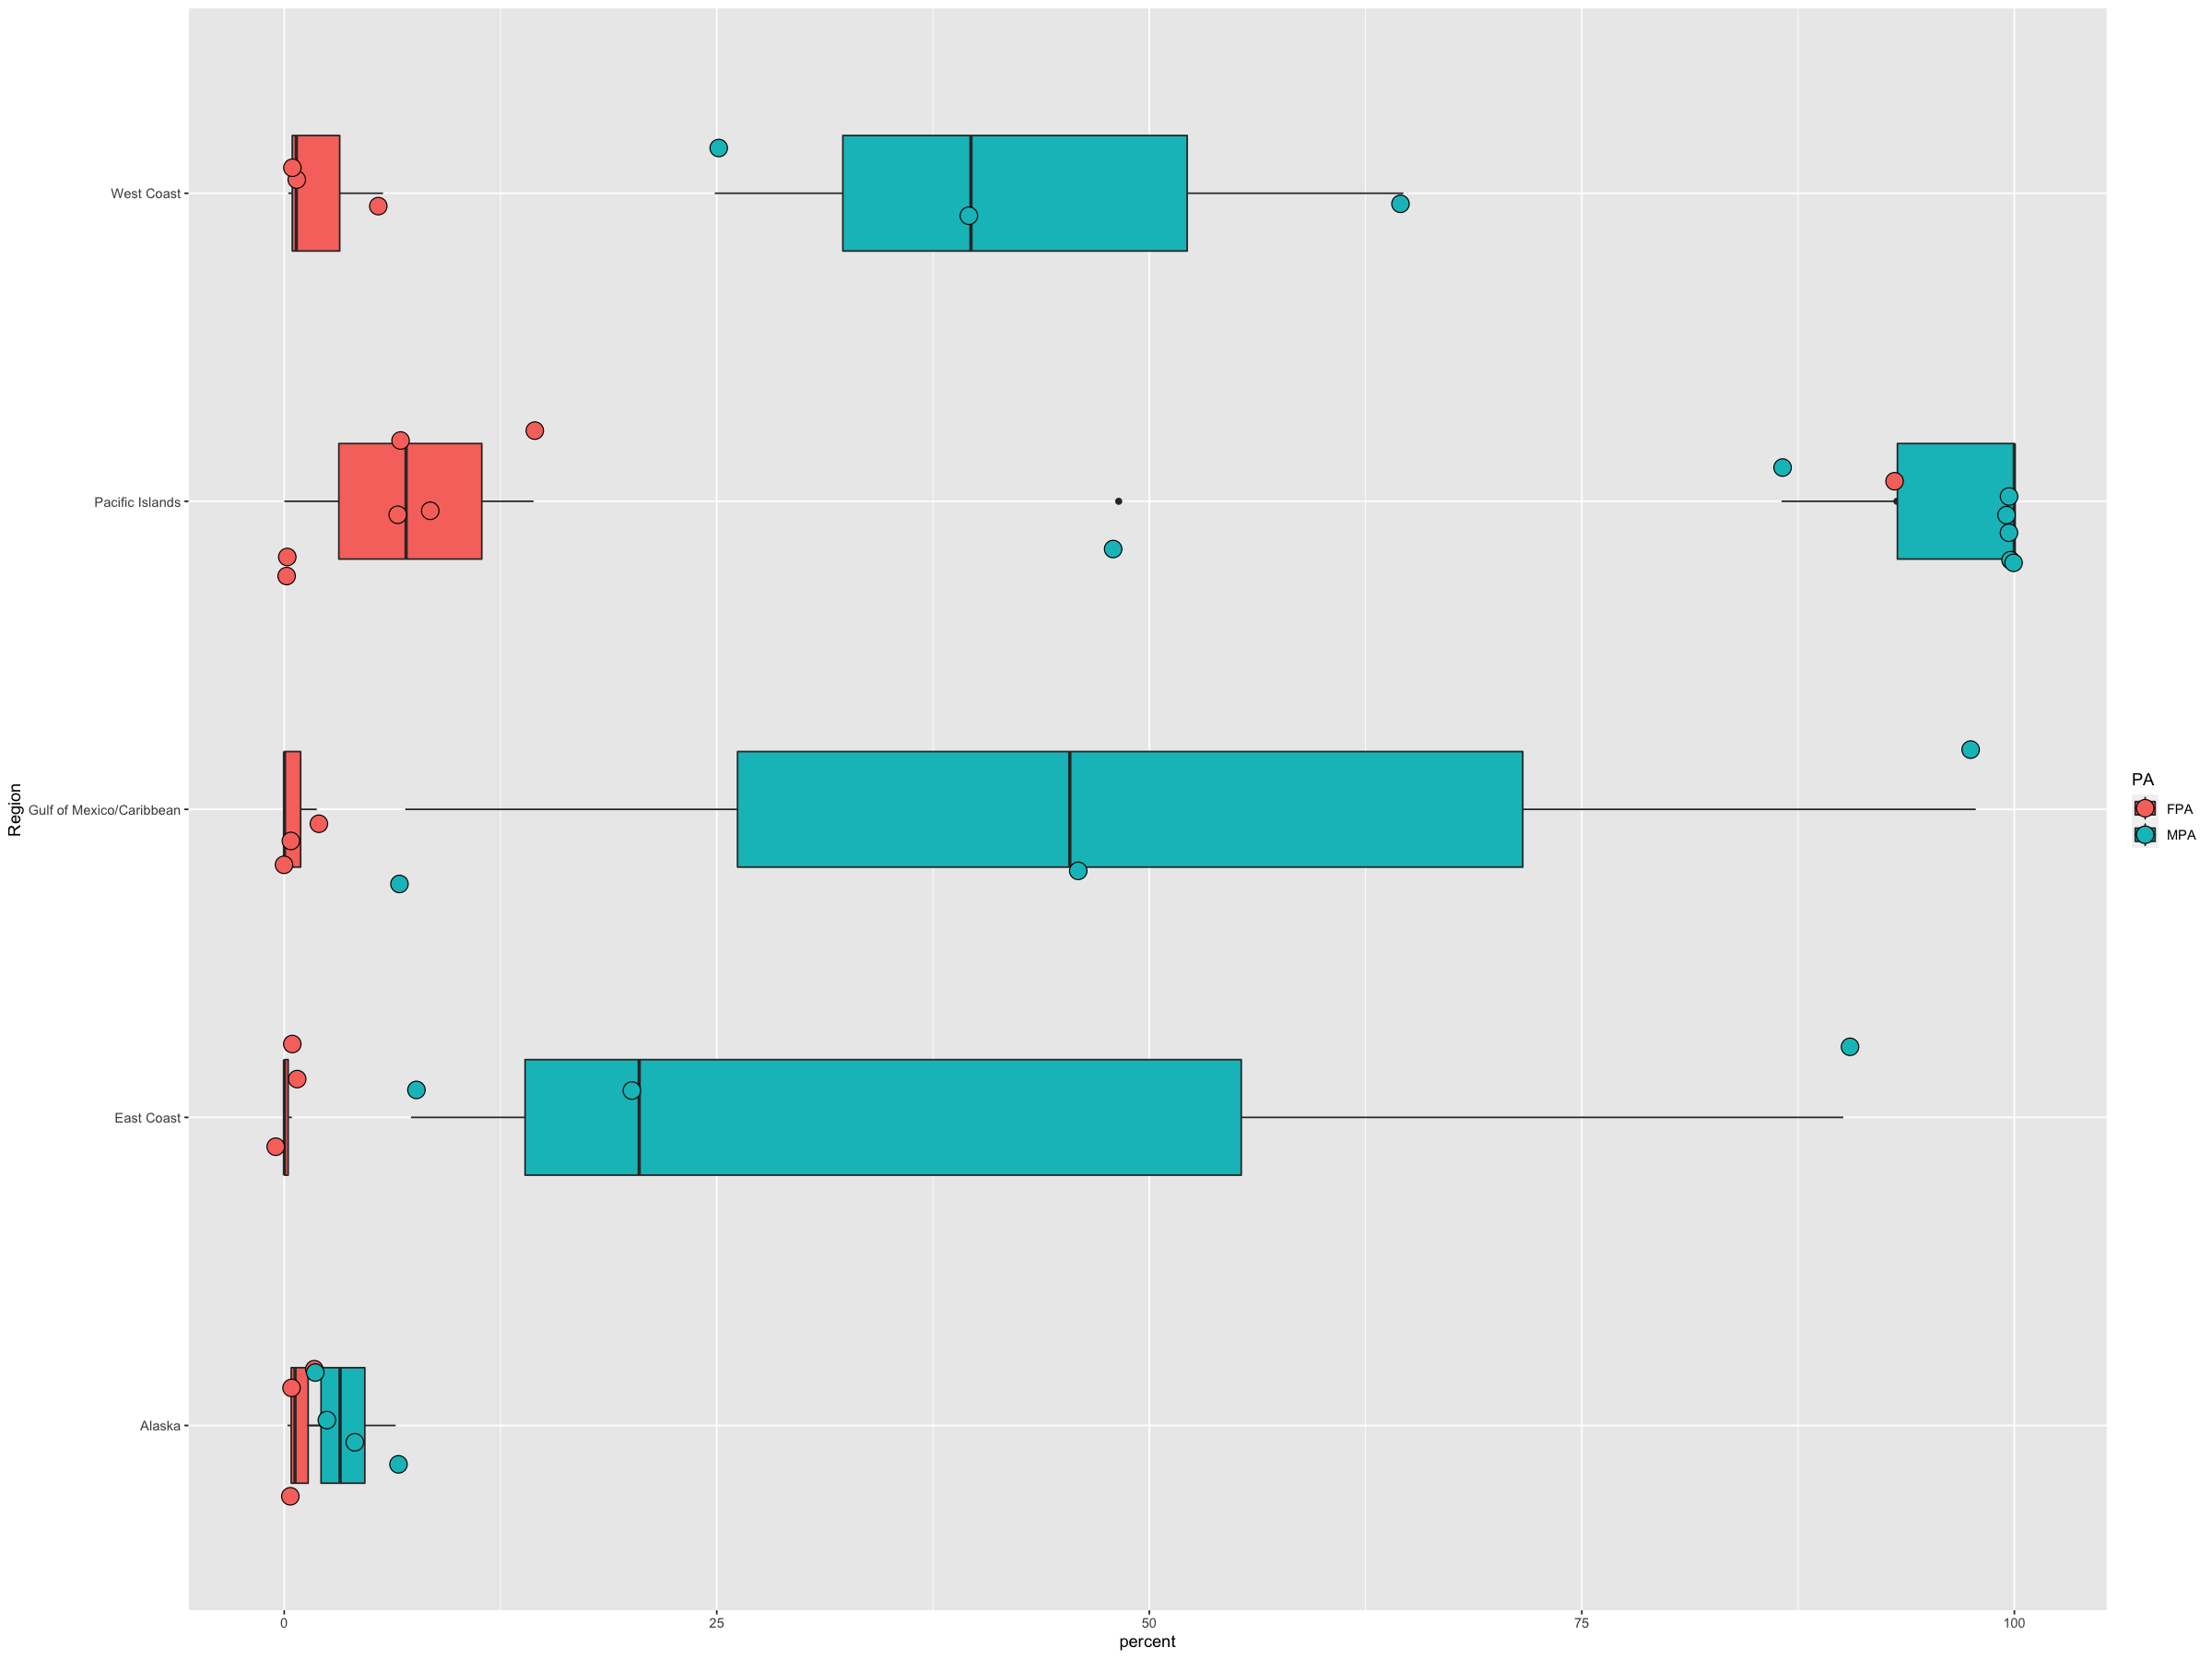

In [59]:
ggplot(Importantareas[Importantareas$IA=="IBA",], aes(y=Region, x=percent, fill=PA))+
geom_boxplot(position=position_dodge(0) )+
geom_point(aes(fill=PA),shape=21,position=position_jitterdodge(dodge.width=0, jitter.height = .5, jitter.width = .5), size=5)



In [64]:
options(repr.plot.width=20, repr.plot.height=4)

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 13 rows containing missing values (geom_point).”


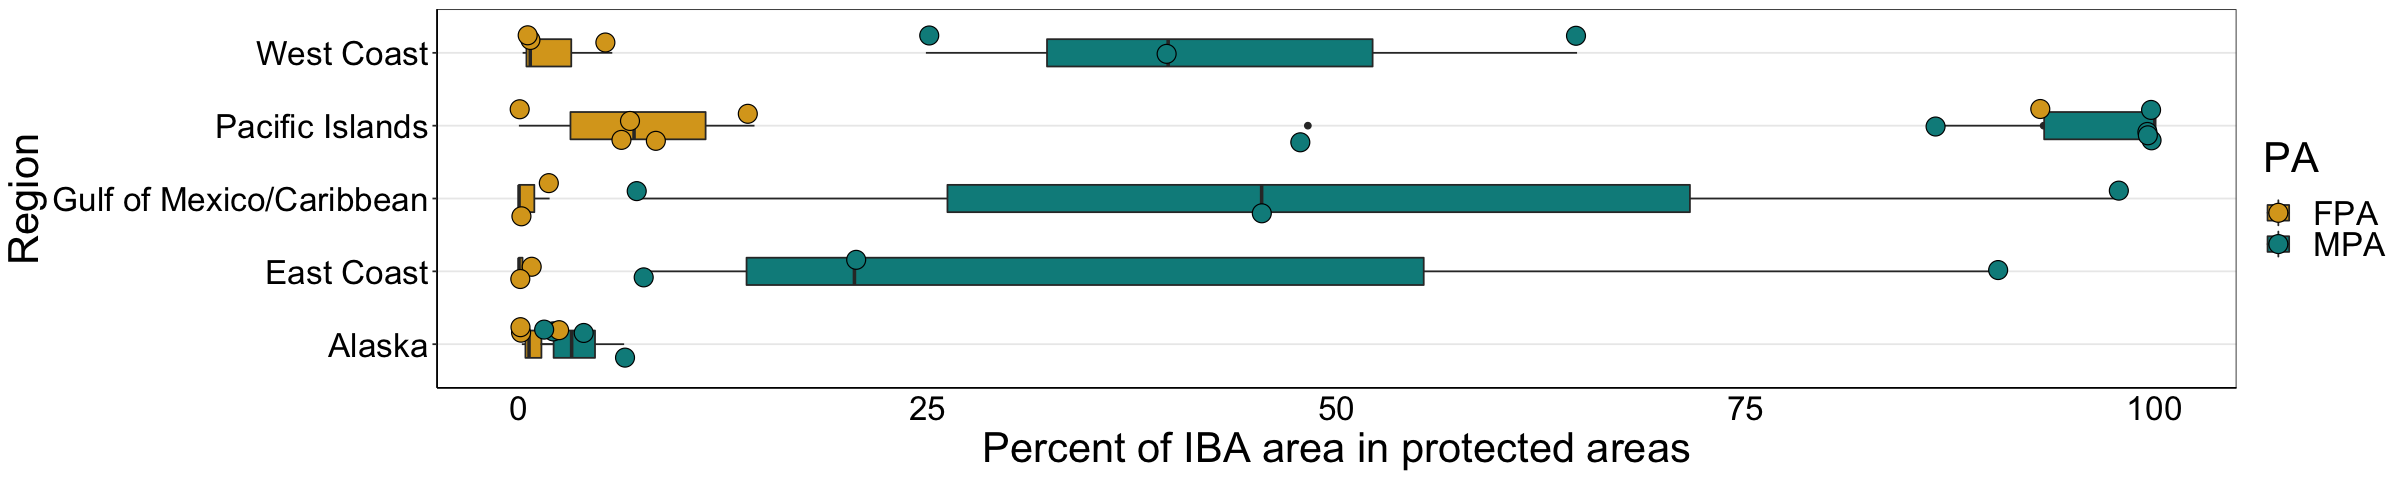

In [65]:
ggplot(Importantareas[Importantareas$IA=="IBA",], aes(y=Region, x=percent, fill=PA)) +
scale_fill_manual(values=c("goldenrod", "cyan4"))+
geom_boxplot(position=position_dodge(0) )+
geom_point(aes(fill=PA),shape=21,position=position_jitterdodge(dodge.width=0, jitter.height = .5, jitter.width = .5), size=5)+
theme_bw()+
xlim(0,100)+
labs(x="Percent of IBA area in protected areas")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25)
      )

Warning message:
“Removed 23 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 28 rows containing missing values (geom_point).”


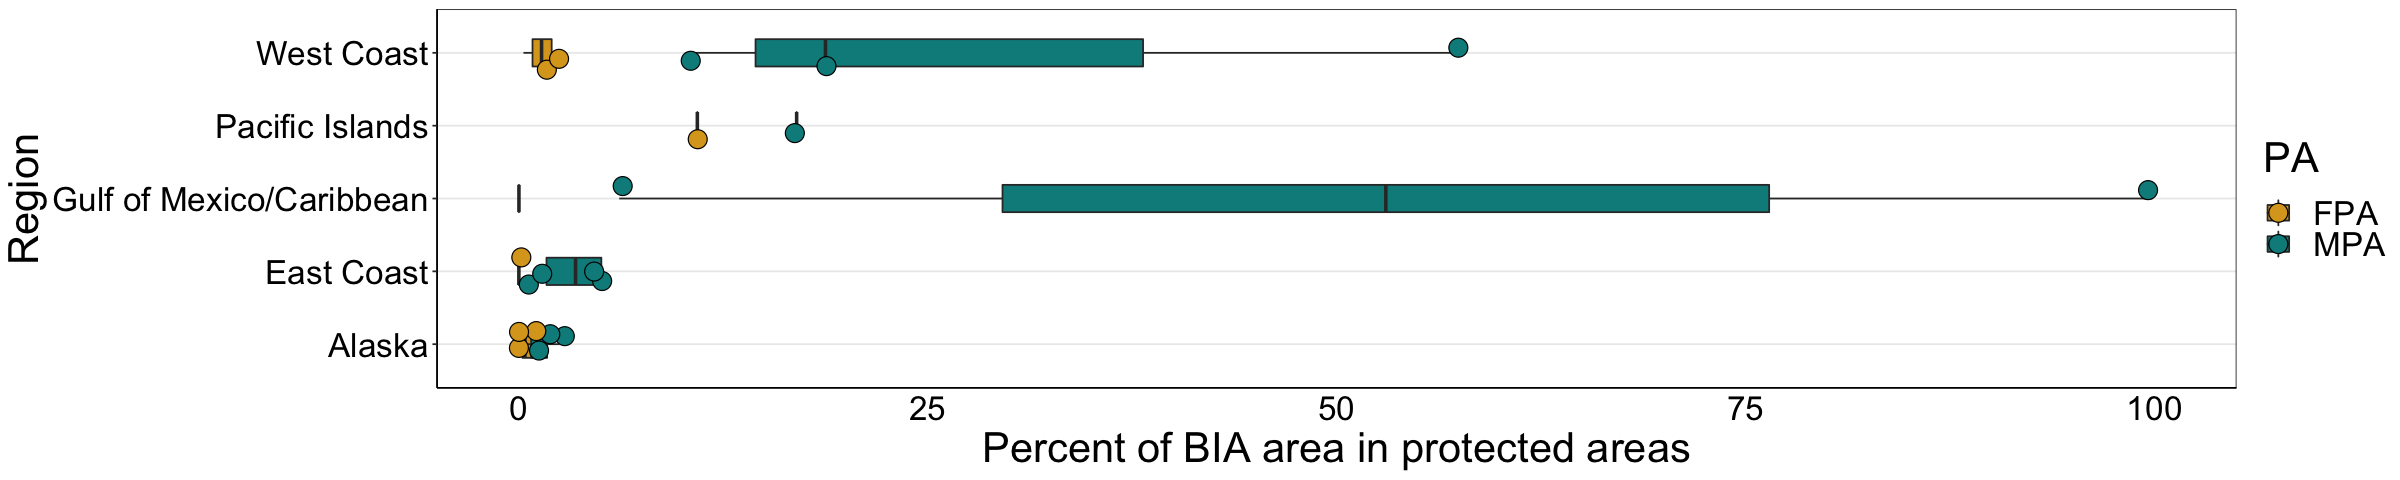

In [66]:
ggplot(Importantareas[Importantareas$IA=="BIA",], aes(y=Region, x=percent, fill=PA)) +
scale_fill_manual(values=c("goldenrod", "cyan4"))+
geom_boxplot(position=position_dodge(0) )+
geom_point(aes(fill=PA),shape=21,position=position_jitterdodge(dodge.width=0, jitter.height = .5, jitter.width = .5), size=5)+
theme_bw()+
xlim(0,100)+
labs(x="Percent of BIA area in protected areas")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25)
      )